In [ ]:
# !pip install matplotlib

In [43]:
# 📦 Pacotes necessários
import json
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# 1. AJUSTES DE LINHAS ANORMAIS NOS MAPAS

In [44]:
pathInicial = "./output_ne_coordinates/"

In [45]:
with open(pathInicial + "Pernambuco.json", "r") as file:
    coords = json.load(file)

In [46]:
# 📊 Visualizar as coordenadas com quebra de linhas entre pontos distantes
def plot_com_quebra(coords, limite_km=50):
    plot_lats = []
    plot_lngs = []

    for i in range(len(coords) - 1):
        plot_lats.append(coords[i]["lat"])
        plot_lngs.append(coords[i]["lng"])

        dist = geodesic(
            (coords[i]["lat"], coords[i]["lng"]),
            (coords[i + 1]["lat"], coords[i + 1]["lng"])
        ).km

        if dist > limite_km:
            plot_lats.append(None)
            plot_lngs.append(None)

    # Adicionar o último ponto
    plot_lats.append(coords[-1]["lat"])
    plot_lngs.append(coords[-1]["lng"])

    plt.figure(figsize=(10, 8))
    plt.plot(plot_lngs, plot_lats, marker='o', linestyle='-')
    plt.title("Visualização com Quebra de Retas Gigantes nome mapa de Maceió/AL")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.show()

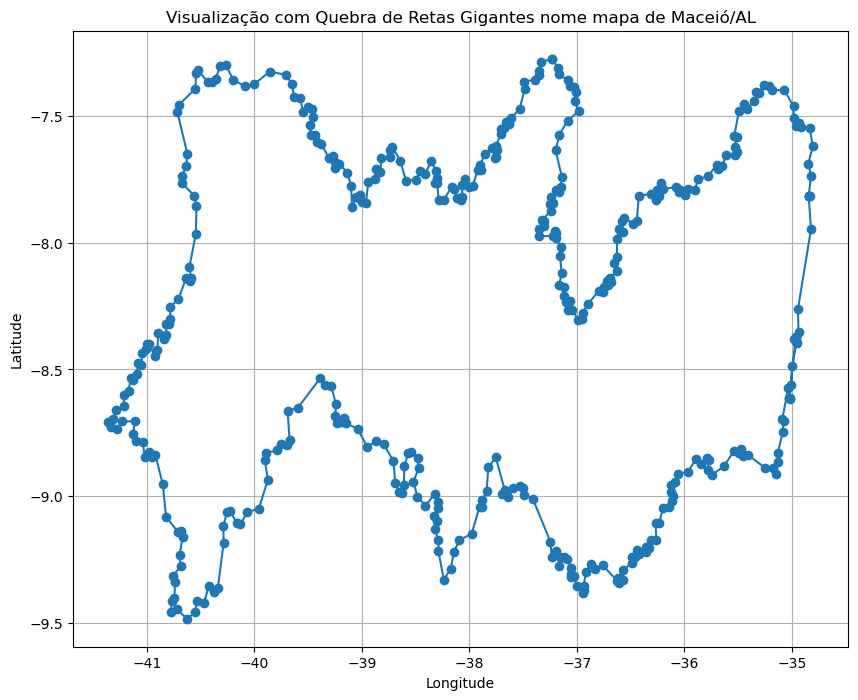

In [47]:
# 🧪 Executar o gráfico
plot_com_quebra(coords)

In [49]:
from geopy.distance import geodesic

def quebrar_linhas_distantes(pontos, limite_km=50):
    """
    Quebra a linha entre pontos distantes demais.

    Args:
        pontos (list): lista de dicionários {"lat": float, "lng": float}
        limite_km (float): distância máxima permitida entre dois pontos consecutivos

    Returns:
        list: nova lista com None como quebra entre segmentos
    """
    resultado = []

    for i in range(len(pontos) - 1):
        resultado.append(pontos[i])
        dist = geodesic(
            (pontos[i]["lat"], pontos[i]["lng"]),
            (pontos[i + 1]["lat"], pontos[i + 1]["lng"])
        ).km
        if dist >= limite_km:
            resultado.append(None)

    resultado.append(pontos[-1])
    return resultado


In [50]:
# 🛠 Aplicando a função para quebrar linhas longas
coordenadas_quebradas = quebrar_linhas_distantes(coords, limite_km=2)

In [51]:
# 📤 Salvando em um novo arquivo
with open(pathInicial+ "Pernanbuco_quebrada.json", "w", encoding="utf-8") as out_file:
    json.dump(coordenadas_quebradas, out_file, indent=2, ensure_ascii=False)

print("Arquivo salvo com linhas quebradas!")

Arquivo salvo com linhas quebradas!


# 2. RESTULTADO DO AJUSTES

In [ ]:
with open(pathInicial + "Pernanbuco_quebrada.json", "r") as file:
    coords1 = json.load(file)

In [52]:
def plot_com_quebra1(coords, limite_km=50):
    plot_lats = []
    plot_lngs = []
    
    for i in range(len(coords) - 1):
        # Pula se o ponto atual ou o próximo for None (quebra)
        if coords[i] is None or coords[i + 1] is None:
            plot_lats.append(None)
            plot_lngs.append(None)
            continue
            
        plot_lats.append(coords[i]["lat"])
        plot_lngs.append(coords[i]["lng"])
        
        dist = geodesic(
            (coords[i]["lat"], coords[i]["lng"]),
            (coords[i + 1]["lat"], coords[i + 1]["lng"])
        ).km
        
        if dist > limite_km:
            plot_lats.append(None)
            plot_lngs.append(None)
    
    # Adiciona o último ponto (se não for None)
    if coords[-1] is not None:
        plot_lats.append(coords[-1]["lat"])
        plot_lngs.append(coords[-1]["lng"])
    
    plt.plot(plot_lngs, plot_lats, '-o')

In [ ]:
# 🛠 Aplicando a função para quebrar linhas longas
coordenadas_quebradas1 = quebrar_linhas_distantes(coords1, limite_km=2)

In [54]:
# 🧪 Executar o gráfico

plot_com_quebra(coords1)

TypeError: 'NoneType' object is not subscriptable

In [ ]:

# 📤 Salvando em um novo arquivo
with open(pathInicial+ "Pernanbuco_correta.json", "w", encoding="utf-8") as out_file:
    json.dump(coordenadas_quebradas1, out_file, indent=2, ensure_ascii=False)

print("Arquivo salvo com linhas quebradas!")